# Topics in Market Microstructure Models - Homework 6 <font color=blue> Solutions </font>

Assigned: July 28, 2016.
Due: August 4, 2016 by 1pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\newcommand{\EE}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cC}{\mathcal{C}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\cM}{\mathcal{M}}
\newcommand{\cI}{\mathcal{I}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this Jupyter notebook to Xinquan Chen (cxq_ccer@163.com) and Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or iPython notebook, please contact your TA Xinquan Chen.

### 1. (18 points)
Following Almgren and Chriss,  assume that the stock price $S_t$ evolves as

$$
dS_t = \sigma\,dZ_t
$$

and the price $\tilde S_t$ at which we transact is given by

$$
\tilde S_t = S_t - \eta\,v_t
$$

where $v_t:=-{\dot x}_t$ is the rate of trading with $x_0 = X$ and $x_T = 0$.

In the lecture notes, we showed that with a risk term that penalizes average VaR instead of variance, the risk-adjusted cost of trading associated with a given price path $\{S_t\}$ is given by

$$
C = \int_0^T\,(S_t - \eta\,v_t) \,dx_t + \lambda\,\sigma\,\int_0^T\,x_t\,dt
$$

for some price of risk $\lambda$. We want to find a (possibly state-dependent) control $v_t$ that minimizes the expected cost $\cC=\E[C]$.

(a) Apply the technique of integration by parts to simplify the term $\int_0^T S_t dx_t$. Write down the HJB equation for the resulting problem.

(b) Solve the first order condition to find the optimal trading rate $v^\star$.    

(c) Substitute $v^\star$ back into the HJB equation to show that the value function $\cC$ must satisfy
$$
\cC_t = \frac{\cC_x^2}{4\,\eta\,} - \lambda \sigma x.
$$

(d) With the terminal condition, 

$$\lim_{t\uparrow T}\cC(t,x) = \begin{cases}0&\text{if $x=0$,}\\
+\infty&\text{if $x\neq0$.}
\end{cases}$$

solve the HJB equaiton with the ansatz $\cC(t,x) = \eta\,\left[a(t)\,x^2 + b(t)\,x + c(t)\right]$. Verify that the optimal trading rate is given by

$$
v^\star = \frac{x}{T-t} + \frac{1}{4}\, \kappa \, (T-t)
$$

with 

$$
\kappa = \frac{\lambda\,\sigma}{\eta}.
$$

(e) Define the characteristic time $T^\star$ as

$$
T^\star=\sqrt{\frac{4\,X}{\kappa}}=\sqrt{\frac{4\,\eta\,X}{\lambda\,\sigma}}.
$$


Verify that the optimal trading strategy with liquidation horizon set to the characteristic time $T^\star$ is given by

$$
\begin{eqnarray*}
x_t&=&X\,\left(1-\frac{t}{T}\right)^2.
\end{eqnarray*}
$$


### <font color=blue> Solution </font>

<font color=blue>(a) </font>  Integrating by parts gives

$$
\int_0^T S_t dx_t = -\int_0^T x_t\, dS_t =  -\sigma\,\int_0^T x_t \,dZ_t
$$

where wlog, we put $S_0=0$.  So $\E\left[\int_0^T S_t dx_t \right]=0$.  The state equations are

$$
\beas
dS_t&=&\sigma\,dZ_t\\
dx_t&=&-v_t\,dt
\eeas
$$

so

$$
\cL^v_t=\frac 12 \sigma^2\,\p_{S,S}-v_t\,\p_x.
$$

The cost function is


$$
\E[C]=\int_0^T\,\eta\,v_t^2\,dt+\lambda\,\sigma\,\int_0^T\,x_t\,dt.
$$

Thus, in the notation of the lecture notes,

$$
h(\cdot)=\eta\,v_t^2+\lambda\,\sigma\,x_t
$$

The HJB equation becomes

$$
\cC_t+\lambda\,\sigma\,x_t+\min_{v \in \mathcal{G}}\left\{-\cC_x\,v+\eta\,v^2\right\}=0.
$$

<font color=blue>(b) </font> Solving the first order condition gives

$$
v^\star=\frac{1}{2\,\eta}\,\cC_x.
$$

<font color=blue>(c) </font> Substituting back into the HJB equation gives the equation for the cost function:

$$
\cC_t=\frac{1}{4\,\eta\,}\,\left( \cC_x\right)^2-\lambda\,\sigma\,x_t
$$

<font color=blue>(d) </font> Using the ansatz $C(t,x) = \eta\,\left[a(t)\,x^2 + b(t)\, x + c(t)\right]$ we have 

$$
\dot a \,x^2 + \dot b\,x +\dot c = \frac{1}{4}\,\left(2 \,a\, x + b\right)^2 - \kappa\,x.
$$

where

$$
\kappa = \frac{\lambda\,\sigma}{\eta}.
$$


Compare the coefficients and obtain the following system of ODEs

$$
\begin{eqnarray*}
\dot a &=& a^2, \\
\dot b &=& a\,b-\kappa,\\
\dot c &=& \frac{b^2}{4}.
\end{eqnarray*}
$$

Solving the first equation subject to the boundary condition gives

$$
a(t) = \frac{1}{T-t}.
$$

The second equation has the solution

$$
b(t) = \frac \kappa 2\,(T-t).
$$

Finally,

$$
c(t) = -\frac{1}{48} \kappa ^2 \,(T-t)^3.
$$

This gives

$$
\cC(t,x) = \frac{\eta}{T-t}\,\left[x^2 + \frac\kappa 2\,(T-t)^2\, x + \frac 1{48}\kappa^2\,(T-t)^4\right].
$$

The optimal trading rate is given by

$$
-\dot x= v^\star=\frac{1}{2\,\eta}\,\cC_x = \frac{x}{T-t} + \frac{1}{4}\, \kappa \, (T-t).
$$

<font color=blue>(e) </font> Integrating this last equation gives the optimal strategy

$$
x(t) = X\, \left(1-\frac{t}{T}\right) \left(1-\frac{\kappa \, t \,T}{4\, X}\right)= X\, \left(1-\frac{t}{T}\right) \left(1-\frac{ t \,T}{{T^\star}^2 }\right) .
$$

Thus, if $T= T^\star$,

$$
x(t) = X\, \left(1-\frac{t}{T}\right) \left(1-\frac{ t }{T}\right) = X\, \left(1-\frac{t}{T}\right)^2 .
$$

as required.

## ABM and GBM

### Download MSFT data

In [3]:
library(highfrequency)
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/MSFT130311.rData_.zip", destfile="MSFT130311.zip")
unzip(zipfile="MSFT130311.zip")
load("MSFT130311.rData")

### 2. (8 points)

Recall from the lecture slides that with time-averaged VaR as the risk penalty, and when the liquidation time $T$ is chosen to be the characteristic time, the optimal trading rate under ABM becomes

$$
v^A(t)= \frac{x_t}{T-t}\,+\frac{X}{T}\,\left(1-\frac t T\right)
$$

and the optimal trading rate under GBM becomes

$$
v^G(t)= \frac{x_t}{T-t}\,+\frac{X}{T}\,\frac{S_t}{S_0}\,\left(1-\frac t T\right).
$$

(a) The *msft.bats* dataset from *MSFT130311.rData* contains all trades on the BATS exchange on 11-Mar-2013.  One trading days has 390 minutes.  Sample the  *msft.bats* dataset evenly, roughly every minute of volume time.  Superimpose plots of the optimal strategy under ABM and GBM assuming liquidation takes place over one trading day.

(b) Denote the corresponding position sizes by $x^A(t)$ and $x^G(t)$ respectively.  What is the maximum deviation of the two position sizes as a percentage of the initial position $X$?  How significant is this deviation?



### <font color=blue> Solution </font>

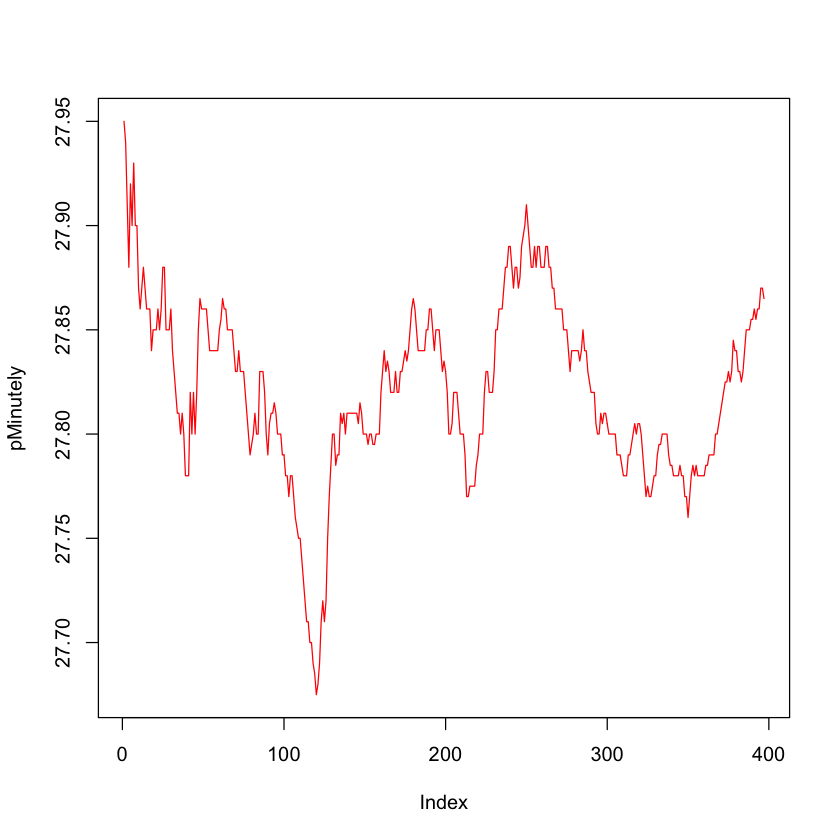

In [6]:
p <- msft130311.bats$trade.price

# First get plot of MSFT price each minute
np <- length(p)
j <- floor(np/390)
pMinutely <- p[seq(1,np,j)]
n <- length(pMinutely)
plot(pMinutely,type="l",col="red")

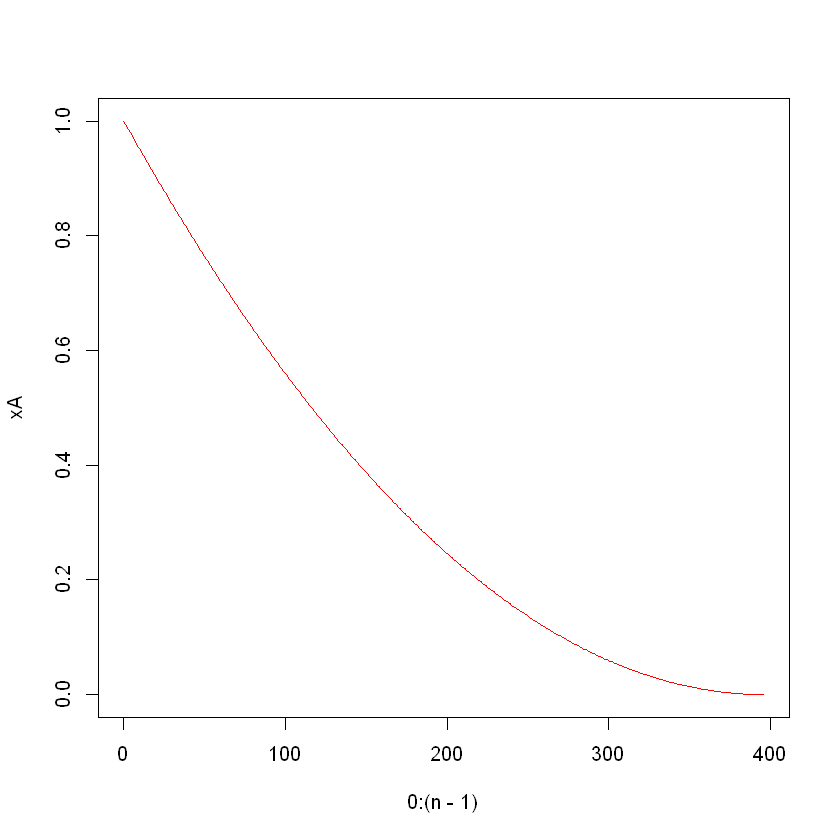

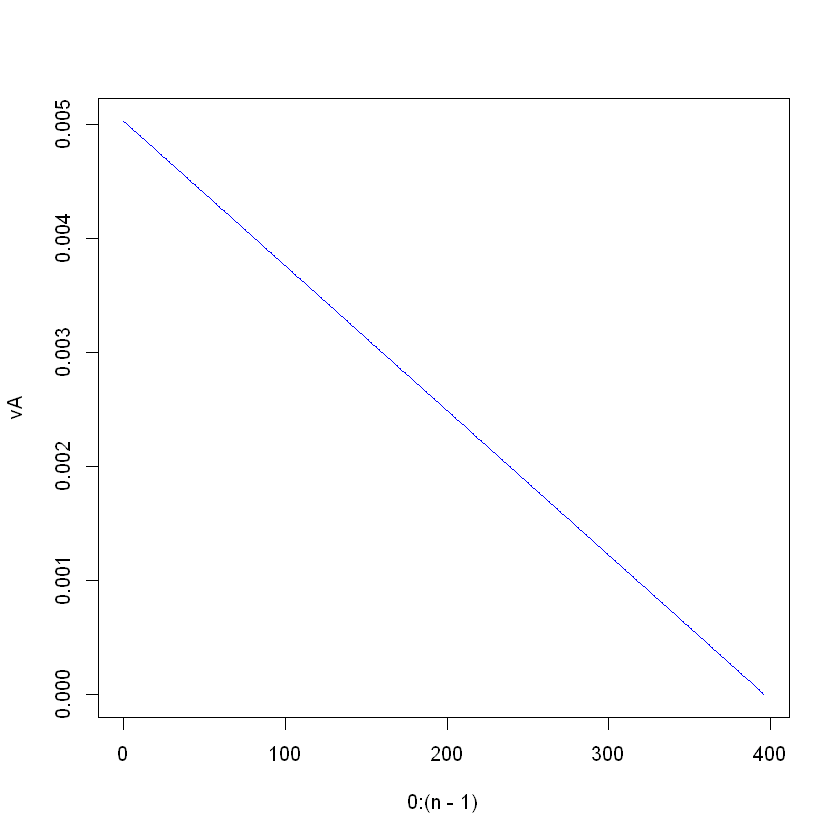

In [4]:
# Optimal strategy under ABM
xA <- numeric(n)
vA <- numeric(n)

xA[1] <- 1
for (j in 1:(n-1)){
    vA[j] <- xA[j]/(n-j) + 1/n*(1-(j+1)/n) 
    xA[j+1] <- xA[j]-vA[j]
    }
plot(0:(n-1),xA,type="l",col="red")
plot(0:(n-1),vA,type="l",col="blue")

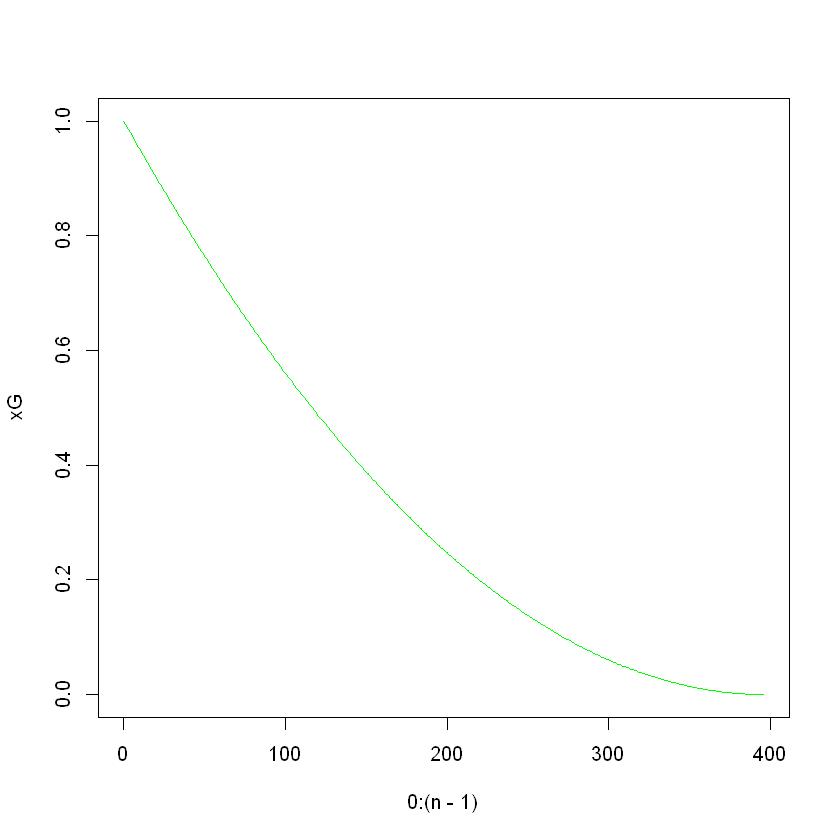

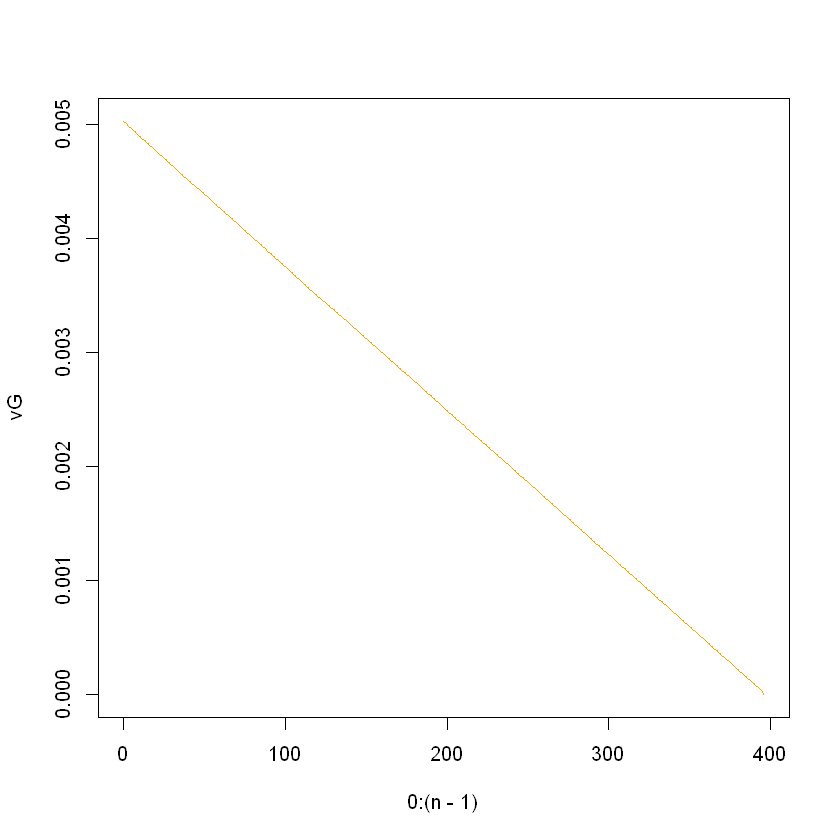

In [5]:
# Optimal strategy under GBM
xG <- numeric(n)
vG <- numeric(n)

xG[1] <- 1 
for (j in 1:(n-1)){
    vG[j] <- xG[j]/(n-j) + 1/n*pMinutely[j]/pMinutely[1]*(1-(j+1)/n)
    xG[j+1] <- xG[j] - vG[j]
    }
plot(0:(n-1), xG, type="l", col="green")
plot(0:(n-1), vG, type="l", col="orange")

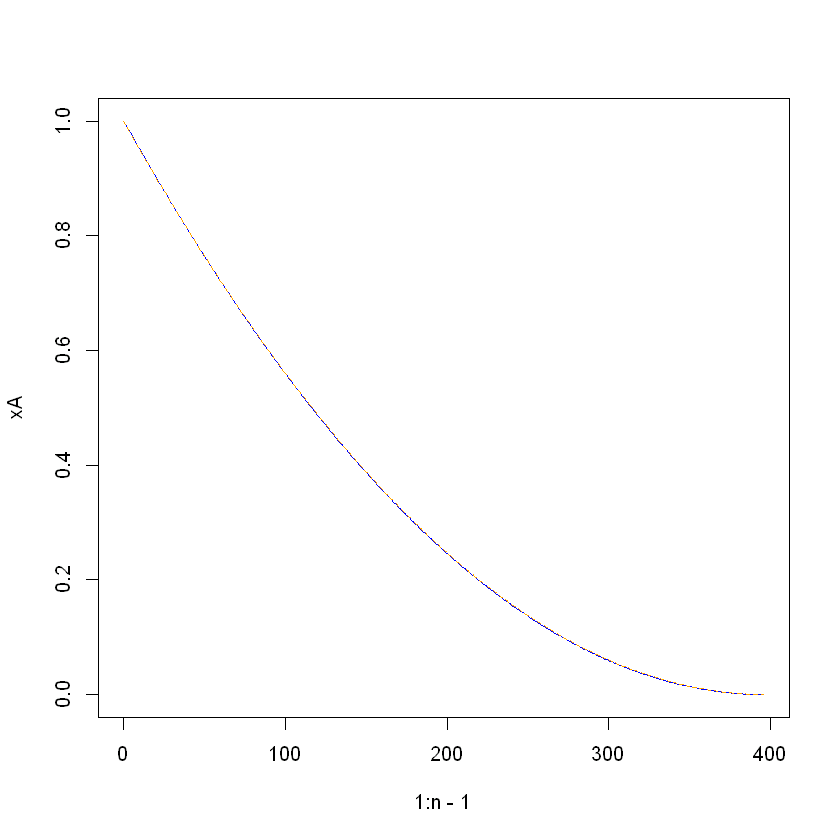

In [6]:
# Superimpose the two strategies
plot(1:n-1,xA,type="l",col="blue")
points(1:n-1,xG,type="l",col="orange",lty=2)

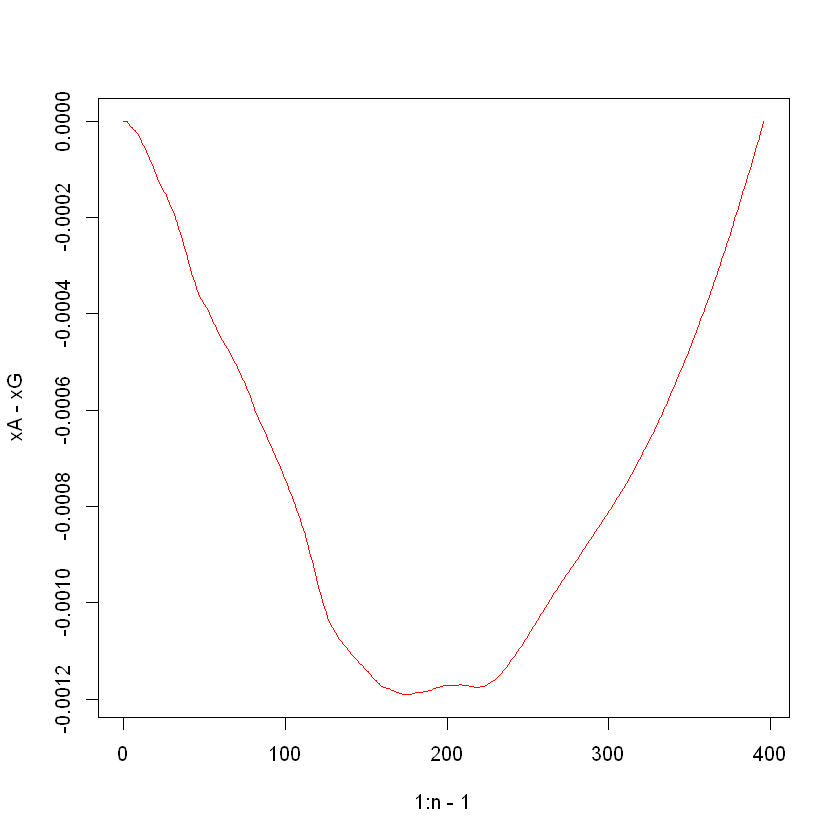

In [7]:
# Look at difference
plot(1:n-1,xA-xG,type="l",col="red")

<font color=blue>(b) </font> The maximum deviation of the two position sizes is $0.12\%$.  This difference is obviously totally insignificant.

In [8]:
#(b)  Largest deviation
(max(abs(xA-xG)))

[1] 0.001190657

## Optimal interval VWAP strategy in the square-root model

### 3. (12 points)

Consider from Lecture 6-2 the cost of liquidation $\cC$ using interval VWAPs:

$$
\cC=\sum_{j=1}^m\,C_{jj}+\sum_{i< j}^m\,C_{ji}.
$$

(a) With $m=3$ (that is 3 interval VWAP slices), and assuming the square-root process where

$$
h(v)=\frac  3 4 \sigma\,\sqrt{\frac{v}{V}} =\frac  3 4 \sigma\,\sqrt{\frac{\dot x}{V}}, 
\quad \mbox{ and } \quad
G(\tau)=1/\sqrt{\tau},
$$

compute explicit expressions for the matrix elements $C_{ji}$ in terms of $x_1$, $x_2$, $t_1$, and $t_2$ (noting that $t_0=0$ and $t_3=T$).

(b) Minimize the resulting expression for the expected cost of liquidation numerically to find optimal choices of $x_1$ and $x_2$ when $t_1=T/3$, and $t_2=2 \,T/3$.

(c) What is the percentage saving from trading with the 3-slice strategy relative to a VWAP?

(d) Explain to your non-mathematical manager why this strategy has lower expected cost.

### <font color=blue> Solution </font>

<font color=blue>(a) </font> We have
$$
\beas
C_{ii}&=&\frac{4}{3}\,x_i\,h(v_i)\,\sqrt{t_i-t_{i-1}}=\alpha\,{x_i}^{3/2},\,i=1,2,3
\eeas
$$

and for $j>i$,

\begin{eqnarray*}
C_{ji}&=&
\frac{4}{3}\,x_j\,h(v_i)\,\frac{\left(t_{j}-t_{i-1}\right)^{3/2}
-\left(t_{j}-t_{i}\right)^{3/2}
-\left(t_{j-1}-t_{i-1}\right)^{3/2}
+\left(t_{j-1}-t_{i}\right)^{3/2}
}{t_{j}-t_{j-1}}\\
&=&
\alpha\,x_j\,\sqrt{x_i}\,\frac{\left(t_{j}-t_{i-1}\right)^{3/2}
-\left(t_{j}-t_{i}\right)^{3/2}
-\left(t_{j-1}-t_{i-1}\right)^{3/2}
+\left(t_{j-1}-t_{i}\right)^{3/2}
}{(t_{j}-t_{j-1})\,\sqrt{t_i-t_{i-1}}}
\end{eqnarray*}
with $\alpha=\sigma/\sqrt{V}$.

Note that these expressions are homogeneous in $x$ and $t$, so wlog, for the purposes of minimizing the cost, we may take $\alpha=1$, $T=3$, $x=1$.

<font color=blue>(b) </font> 
See the R-code for the numerical solution which is $64.7\%$ in the first slice, nothing in the second slice and the remainder in the last slice.

In [9]:
options(warn = -1)

cDiag <- function(i){x[i]^(3/2)}

cOffDiag <- function(j,i){
  x[j]*sqrt(x[i])/sqrt(t[i+1]-t[i])/(t[j+1]-t[j])*
    ((t[j+1]-t[i])^(3/2)-(t[j+1]-t[i+1])^(3/2)-(t[j]-t[i])^(3/2)+(t[j]-t[i+1])^(3/2))
}

cost <- function(x){
  n <- length(x)
  t <- (0:n)/n
  cDiag <- function(i){x[i]^(3/2)}
  cOffDiag <- function(j,i){
  x[j]*sqrt(x[i])/sqrt(t[i+1]-t[i])/(t[j+1]-t[j])*
    ((t[j+1]-t[i])^(3/2)-(t[j+1]-t[i+1])^(3/2)-(t[j]-t[i])^(3/2)+(t[j]-t[i+1])^(3/2))
  }
  diag <- sum(cDiag(1:n))
  offDiag <- 0
  for (j in 2:n){
    for (i in (1:(j-1))){
      offDiag <- offDiag + cOffDiag(j,i)  
    }
  }
  return(diag+offDiag)
  }

costObj3 <- function(x){cost(c(x[1],x[2],1-x[1]-x[2]))}

res <- optim(c(1/3,1/3),costObj3)
res$par
#[1] 6.470814e-01 2.005129e-16

costObj31 <- function(x){cost(c(x,0,1-x))}
(res1 <- optimize(costObj31,c(0.5,1)))
#$minimum
#[1] 0.6470812

#$objective
#[1] 0.8832821

[1] 6.470814e-01 2.005129e-16

$minimum
[1] 0.6470812

$objective
[1] 0.8832821

<font color=blue>(c) </font> The relative cost is $88.3\%$ which represents a saving of $11.7\%$ over VWAP.

<font color=blue>(d) </font> The 3-slice strategy has lower expected cost because it takes advantage of price reversion after the initial interval VWAP execution.
